In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as plt
import seaborn as sns

In [2]:
titanic = pd.read_csv('titanic.csv')

In [3]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


1 .How many passengers are in our passenger list? From here forward, we will assume our dataset represents the full passenger list of Titanic.

In [4]:
len(titanic.PassengerId.unique())

891

2. What is the overall survival rate?

In [5]:
survival_rate = (titanic[titanic.Survived == 1]['Survived'].count() / titanic.Survived.count())*100
print(survival_rate.round(2),"%")

38.38 %


3.	How many male passengers were onboard?

In [6]:
Male=titanic[titanic.Sex == "male"]['Sex'].count()
print(Male,"Male passengers were onboard")

577 Male passengers were onboard


4.	How many female passengers were onboard?

In [7]:
Female = titanic[titanic.Sex == "female"]['Sex'].count()
print(Female,"Female passengers were onboard")

314 Female passengers were onboard


5.	What is the overall survival rate of male passengers?

In [8]:
survival_rate_male = (titanic[(titanic.Sex == "male") & (titanic.Survived == 1)]['Sex'].count() / Male*100).round(2)
print ("Survival rate of Male passengers is",survival_rate_male,"%")

Survival rate of Male passengers is 18.89 %


6.	What is the overall survival rate of female passengers?

In [9]:
survival_rate_female = (titanic[(titanic.Sex == "female") & (titanic.Survived == 1)]['Sex'].count() / Female*100).round(2)
print ("Survival rate of Female passengers is",survival_rate_female,"%")

Survival rate of Female passengers is 74.2 %


7.	What is the average age of all passengers onboard?

*	How did you calculate the average age?

*	Note that some of the passengers do not have an age value. How did you deal with this?


In [10]:
titanic.isnull().sum()  #checking number of NA values in each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
titanic.Age.fillna(titanic.Age.median(), inplace =True) #replace Age NA with median value
#Some of the passengers did not have age value.
#So we used .fillna() function to fill those values with Median Age value

In [12]:
titanic.isnull().sum()  #Again checking number of NA values in each column after replacing Age NA values with median

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
Avg_age = titanic.Age.mean()
print("Average age of all passengers onboard is",round(Avg_age,2),"years")

Average age of all passengers onboard is 29.36 years


8.	What is the average age of passengers who survived?

In [14]:
Avg_age_Survived=titanic[titanic.Survived == 1]['Age'].mean()
print("Average age of Passengers who survived is",round(Avg_age_Survived,2),"years")

Average age of Passengers who survived is 28.29 years


9.	What is the average age of passengers who did not survive?

In [15]:
Avg_age_Not_Survived= titanic[titanic.Survived == 0]['Age'].mean()
print("Average age of Passengers who did not survive is",round(Avg_age_Not_Survived,2),"years")

Average age of Passengers who did not survive is 30.03 years


10.	At this (early) point in our analysis, what might you infer about any pattern you are seeing?

Answer : Mostly young passengers of Average age 28.29 survived . 

Mostly Female passengers survived, as the survival rate of female passenger is significantly more than the male passengers.

11.	How many passengers are in each of the three classes of service (e.g. First, Second, and Third?)

In [16]:
First = titanic[titanic.Pclass == 1]['Pclass'].count()
print("Passenger in First Class:",First)

Passenger in First Class: 216


In [17]:
Second = titanic[titanic.Pclass == 2]['Pclass'].count()
print("Passenger in Second Class:",Second)

Passenger in Second Class: 184


In [18]:
Third = titanic[titanic.Pclass == 3]['Pclass'].count()
print("Passenger in Third Class:",Third)

Passenger in Third Class: 491


12.	What is the survival rate for passengers in each of the three classes of service?

In [19]:
survival_rate_firstclass = round(((titanic[(titanic.Pclass == 1) & (titanic.Survived == 1)]['Pclass'].count()/First)*100),2)
print("Survival rate of First Class Passengers is:" ,survival_rate_firstclass,"%")

Survival rate of First Class Passengers is: 62.96 %


In [20]:
survival_rate_secondclass = round(((titanic[(titanic.Pclass == 2) & (titanic.Survived == 1)]['Pclass'].count()/Second)*100),2)
print("Survival rate of Second Class Passengers is:" ,survival_rate_secondclass,"%")

Survival rate of Second Class Passengers is: 47.28 %


In [21]:
survival_rate_thirdclass = round(((titanic[(titanic.Pclass == 3) & (titanic.Survived == 1)]['Pclass'].count()/Third)*100),2)
print("Survival rate of Third Class Passengers is:" ,survival_rate_thirdclass,"%")

Survival rate of Third Class Passengers is: 24.24 %


13.	What else might you conclude?

Survival Rate of passenger decreases as the class of passenger decreases.

Survival Rate is directly proportional to Class of passenger. Hence it can be inferred in case of ship wreckage the chances of survival increase for the first class passengers.

14.	Last, if we were to build a predictive model, which features in the data do you think we should include in the model and which can we leave out? Why?

In [22]:
GenderDummy = pd.get_dummies(titanic.Sex, prefix = "Gender")
del GenderDummy['Gender_male']
titanic1 = pd.concat([titanic , GenderDummy], axis = 1)
titanic1.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender_female
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [23]:
titanic1.corr().round(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender_female
PassengerId,1.000,-0.005,-0.035,0.034,-0.058,-0.002,0.013,-0.043
Survived,-0.005,1.000,-0.338,-0.065,-0.035,0.082,0.257,0.543
Pclass,-0.035,-0.338,1.000,-0.340,0.083,0.018,-0.549,-0.132
Age,0.034,-0.065,-0.340,1.000,-0.233,-0.172,0.097,-0.081
SibSp,-0.058,-0.035,0.083,-0.233,1.000,0.415,0.160,0.115
Parch,-0.002,0.082,0.018,-0.172,0.415,1.000,0.216,0.245
Fare,0.013,0.257,-0.549,0.097,0.160,0.216,1.000,0.182
Gender_female,-0.043,0.543,-0.132,-0.081,0.115,0.245,0.182,1.000


Quantitative Analysis : 

Y = Survived 

Variables to include in the model (X):  Pclass , Age ,Fare , Sex(Gender_Female) , SibSp, Parch

Reason : beacuse they have good correlation with Survived 

Variable to not include in the model : PassengerId , Name , Ticket , Cabin

Reason: donot contirbute towards Data Analysis 

15.	Use visualization techniques for few variables of interest. Specially, visualize association of different variables with survival rate.

<AxesSubplot:xlabel='Sex', ylabel='count'>

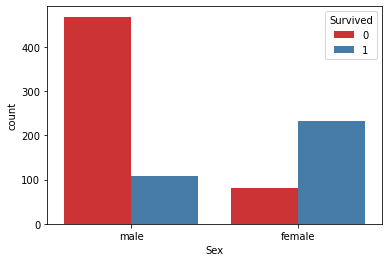

In [24]:
sns.countplot(x='Sex', hue = 'Survived',data = titanic , palette="Set1")


<AxesSubplot:xlabel='Age', ylabel='Count'>

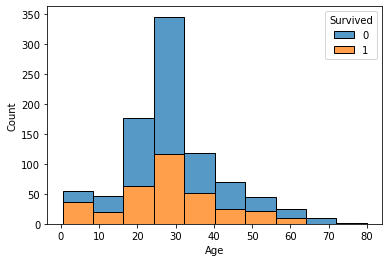

In [25]:
sns.histplot(x='Age', hue = 'Survived', bins = 10, multiple = 'stack', data = titanic)


<AxesSubplot:xlabel='Pclass', ylabel='count'>

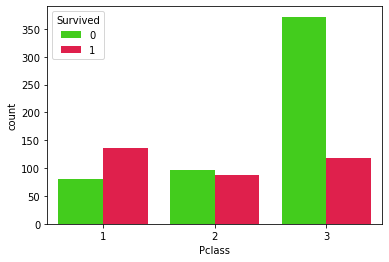

In [26]:
sns.countplot( x = "Pclass", hue = 'Survived', data = titanic , palette ='prism')

<AxesSubplot:>

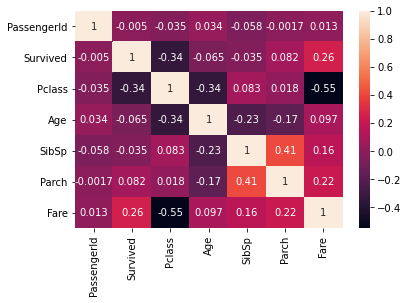

In [27]:
sns.heatmap(titanic.corr()  , annot = True)

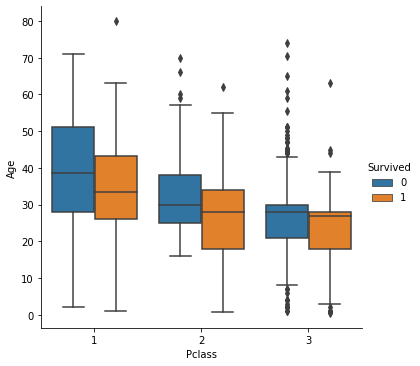

In [28]:
sns.catplot(x='Pclass',y='Age',data= titanic ,hue='Survived',kind ="box")